### python libraries - the ultimate toolkits for modern-day analysts


# download data

### import libaries

In [4]:
# access libaries
import yfinance as yf
import sqlite3

# scientific computing pandas (data structures & tools), NumPy (array & tools), SciPy (Integrals, solving differential equations, optimization)
import pandas as pd
import numpy as np

# Visualization matplotlib (plots & graphs, most popular), seaborn (plots: heat maps, time series, violin plots)
import matplotlib.pyplot as plt
import seaborn as sns


# Algorithmic scikit-learn (machine learning: Regression, classification, and so on), statsmodels (explore data, estimate statistical models, and perform statistical tests)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### build stock class

In [5]:
class stock:
    def __init__(self, ticker_symbol):
        self.ticker_symbol = ticker_symbol
        self.data = yf.download(ticker_symbol, start="2021-11-01", end="2024-03-31")
        self.company_name = yf.Ticker(ticker_symbol).info['longName']  
        self.currency = yf.Ticker(ticker_symbol).info['currency']

    def save_stock_data(self):
        self.data.to_csv('data/' + self.company_name + '.csv')
    
    def print_stock_data(self):
        print(self.data.head())

    def plot_stock_data(self):
        self.data['Close'].plot()
        plt.title(self.company_name)
        plt.show()

    def correlation_two_variables():
        sns.regplot(x="engine-size", y="price", data=df)
        plt.ylim(0,)

    def to_sqlite_database(self):
        conn = sqlite3.connect('stocks_original.db')
        self.data['Close'].to_sql(name=self.company_name, con=conn, if_exists='replace')
        conn.commit()
        conn.close()  

###  use stock class to store data in csv file and sqlite db

In [6]:
ticker_symbols = ['WOOE.AS', 'WY', 'SCA-B.ST', 'SUZ', 'SK3.IR', 'IP', 'STERV.HE','RYN', 'WFG', 'WRK', 'PCH']

for i in range(len(ticker_symbols)): 
    stock_obj = stock(ticker_symbols[i])
    stock_obj.save_stock_data()
    stock_obj.to_sqlite_database()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


# understand data - ETF

### use stock class to check data and plot graph

[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2021-11-05  30.709400  30.709400  30.709400  30.709400  30.709400       0
2021-11-08  30.705601  30.705601  30.705601  30.705601  30.705601       0
2021-11-09  30.667200  30.667200  30.667200  30.667200  30.667200       0
2021-11-10  30.441799  30.441799  30.441799  30.441799  30.441799       0
2021-11-11  30.740801  30.740801  30.740801  30.740801  30.740801       0


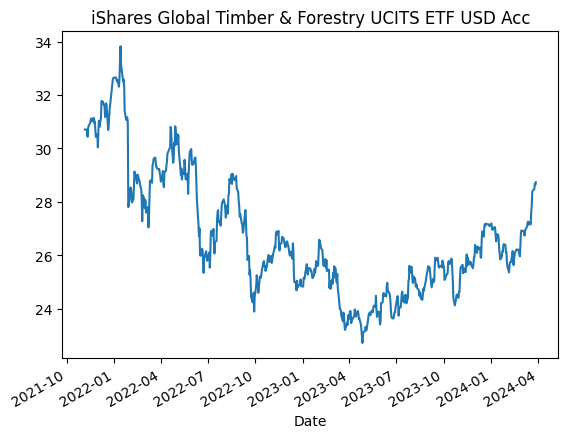

In [7]:
ETF_wood = stock('WOOE.AS')
ETF_wood.print_stock_data()
ETF_wood.plot_stock_data()

### or use csv file to read data

In [8]:
df_timber_etf = pd.read_csv('data/iShares Global Timber & Forestry UCITS ETF USD Acc.csv')
df_timber_etf[['Date', 'Close']].describe(include = 'all')

,Date,Close
count,609,609.000000
unique,609,NaN
top,2021-11-05,NaN
freq,1,NaN
mean,NaN,26.670818
std,NaN,2.267329
min,NaN,22.730000
25%,NaN,25.087999
50%,NaN,26.042700
75%,NaN,28.146299


In [14]:
s = df_timber_etf.loc[df_timber_etf['Close'] <= 22.730000, 'Date']
print(s.head())

372    2023-04-27
Name: Date, dtype: object


In [15]:
s = df_timber_etf.loc[df_timber_etf['Close'] >= 33.823799, 'Date']
print(s.head())

43    2022-01-13
Name: Date, dtype: object


<font color='#5891db'>The ETF shown had a high at the beginning of 2022 and a low in the middle of 2023. The price increased until April 2024.</font>

# understand data - stocks

[**********            20%%                      ]  2 of 10 completed

[*********************100%%**********************]  10 of 10 completed


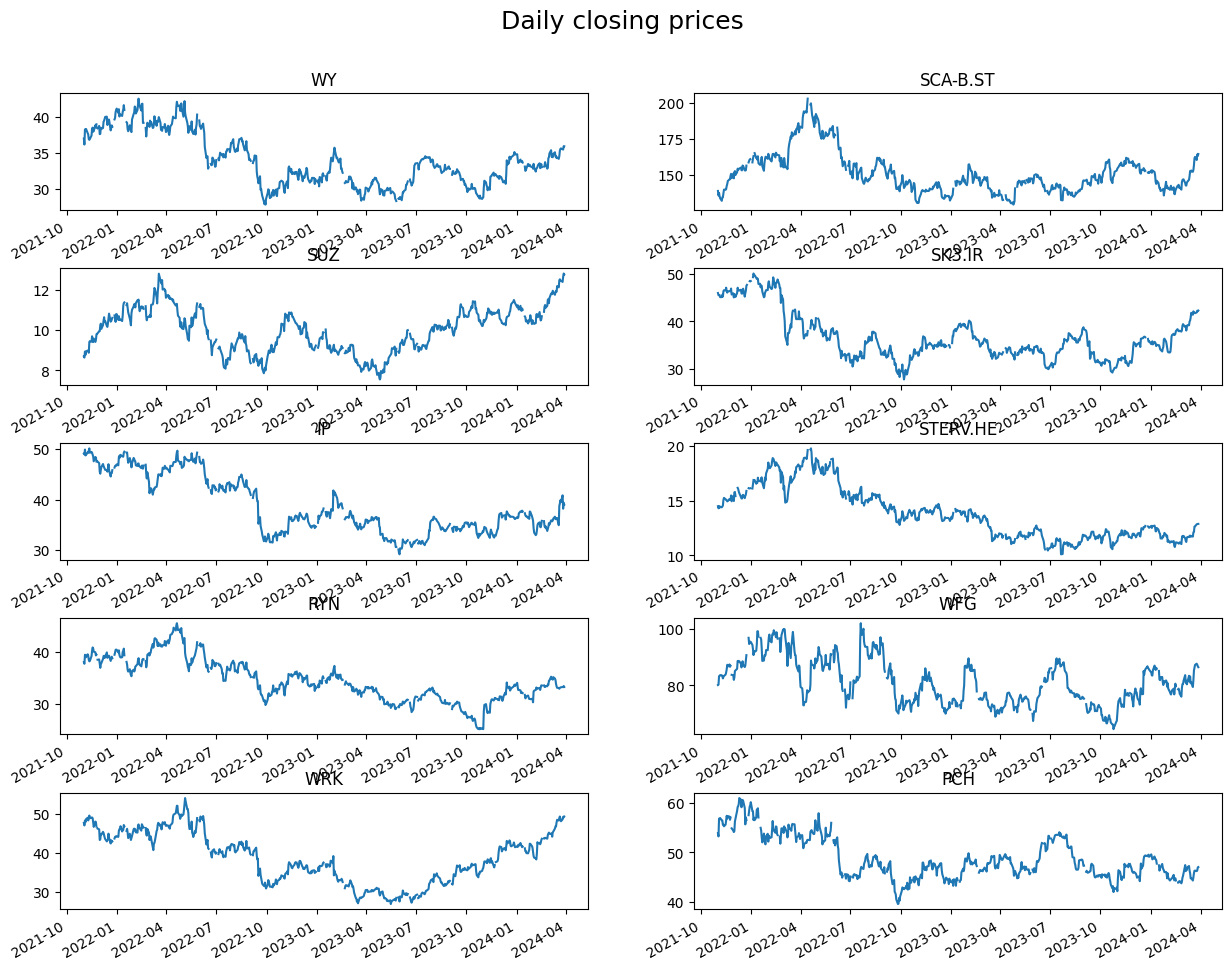

In [16]:
ticker_symbols = ['WY', 'SCA-B.ST', 'SUZ', 'SK3.IR', 'IP', 'STERV.HE','RYN', 'WFG', 'WRK', 'PCH']
prices = yf.download(ticker_symbols, start="2021-11-01", end="2024-03-31")
df = prices['Close'].melt(ignore_index=False,var_name="ticker", value_name="closing_price")

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Daily closing prices", fontsize=18, y=0.95)


for ticker, ax in zip(ticker_symbols, axs.ravel()):
    df[df["ticker"] == ticker].plot(ax=ax)
    ax.set_title(ticker.upper())
    ax.get_legend().remove()
    ax.set_xlabel("")

plt.show()

<font color='#5891db'>In an initial visual assessment, all of the 10 graphs show high levels and 7 out of 10 graphs show low levels in the middle of 2023. In 7 out of 10 graphs the values ​​will increase again by April 2024.</font>

#  <font color='#bd1c3f'>LINEAR REGRESSION</font> <br>These questions arise

## 1. ETF - Price- Time

<font>1.1 Is there a linear temporal connection regarding  <br>iShares Global Timber & Forestry UCITS ETF price?</font> 

#  <font color='#bd1c3f'>MULTIBLE LINEAR REGRESSION</font> <br>These questions arise

<font>1.1 Is there a linear temporal connection regarding  <br>iShares Global Timber & Forestry UCITS ETF price?</font> 

#  <font color='#bd1c3f'>POLYNOMIAL REGRESSION</font> <br>These questions arise

## 1. ETF - Price- Time

<font>1.1 Is there a polynominal temporal connection regarding  <br>iShares Global Timber & Forestry UCITS ETF price?</font> 

<font color='#5891db'> All curves are largely synchronous. They all have low points in 2008 and 2020. Peaks in economic growth are for the EU-27 and the United Kingdom in 2021 and for Germany in 2010.</font>